# Multi-class Classification with Tensorflow : Identifying Dart Players


### Exploratory Data Analysis


We will build classification model in Keras with the dart player dataset.

Our goal is to distinguish from the dart throwing result which shot belongs to which player. The dataset comes with 2 features: X co-ordinates and Y co-ordinates. These features represent the position of the thrown darts on dart boards by different players. The labels are found in the dataframe's competitor column.

In [3]:
import pandas as pd
darts = pd.read_csv("darts.csv")
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


We will explore some visualizations on our dataset. Although deep learning models are very strong and can easily identify complex patterns, exploring the dataset can give us some insight on how we can approach the end-to-end solution

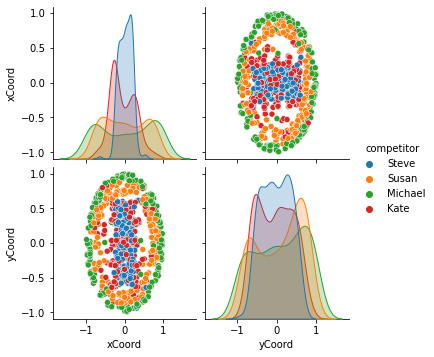

In [4]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Use pairplot and set the hue to be our class column
sns.pairplot(darts, hue='competitor') 

# Show the plot
plt.show()



In [5]:
# Describe the data
print('Dataset stats: \n', darts.describe())

# Count the number of observations per class
print('Observations per class: \n', darts['competitor'].value_counts())

Dataset stats: 
            xCoord      yCoord
count  800.000000  800.000000
mean     0.005943    0.022868
std      0.475971    0.514482
min     -0.991140   -0.993547
25%     -0.295314   -0.423079
50%      0.000619    0.034483
75%      0.273953    0.452204
max      0.984816    0.994344
Observations per class: 
 Steve      200
Susan      200
Michael    200
Kate       200
Name: competitor, dtype: int64
